In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Para preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

# Ignorar warnings (opcional)
import warnings
warnings.filterwarnings("ignore")

# 1. CARGA DE DATOS

df = pd.read_csv("/workspaces/ejercicio_regresion_logistica/data/raw/bank-marketing-campaign-data.csv", sep=";")


df.head()



age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
# Dimensiones del dataset
print("Shape (filas, columnas):", df.shape)

# Información de tipos de datos y nulos
df.info()

# Descripción estadística de numéricas
df.describe()


Shape (filas, columnas): (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

Detección de duplicados

In [4]:
print("Número de filas duplicadas:", df.duplicated().sum())

# Si quisieras eliminar duplicados:
df = df.drop_duplicates()
print("Shape tras eliminar duplicados:", df.shape)


Número de filas duplicadas: 12
Shape tras eliminar duplicados: (41176, 21)


Revisión rápida de valores nulos

In [5]:
print("Valores nulos totales por columna:")
print(df.isnull().sum())


Valores nulos totales por columna:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [6]:
# Información de tipos de datos y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

# INVESTIGAR: ONE HOT ENCODING

In [7]:
# import pandas as pd
# import json

# def one_hot_encode_and_save(df, output_file='transformacion.json'):
#     """
#     Realiza One-Hot Encoding en un DataFrame, identifica automáticamente las columnas categóricas,
#     y guarda el resultado en un archivo JSON.

#     Parámetros:
#     df (pd.DataFrame): DataFrame a transformar.
#     output_file (str): Nombre del archivo de salida JSON (por defecto 'transformacion.json').
#     """
#     # Paso 2: Identificar columnas categóricas
#     # Las columnas categóricas suelen ser de tipo 'object' en pandas
#     categorical_columns = df.select_dtypes(include=['object']).columns
    
#     # Paso 3: Aplicar One-Hot Encoding
#     df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, prefix_sep='_')
    
#     # Paso 4: Guardar el resultado en un archivo JSON
#     # Convertimos el DataFrame a un diccionario y luego a JSON
#     df_encoded_dict = df_encoded.to_dict(orient='records')
#     with open(output_file, 'w') as json_file:
#         json.dump(df_encoded_dict, json_file, indent=4)
    
#     print(f"Dataset transformado guardado en {output_file}")

# # Ejemplo de uso de la función
# df = pd.read_csv("/workspaces/ejercicio_regresion_logistica/data/raw/bank-marketing-campaign-data.csv", sep=";")  # Asumiendo que ya tenemos un DataFrame cargado
# one_hot_encode_and_save(df)

a) Histplot para algunas variables numéricas

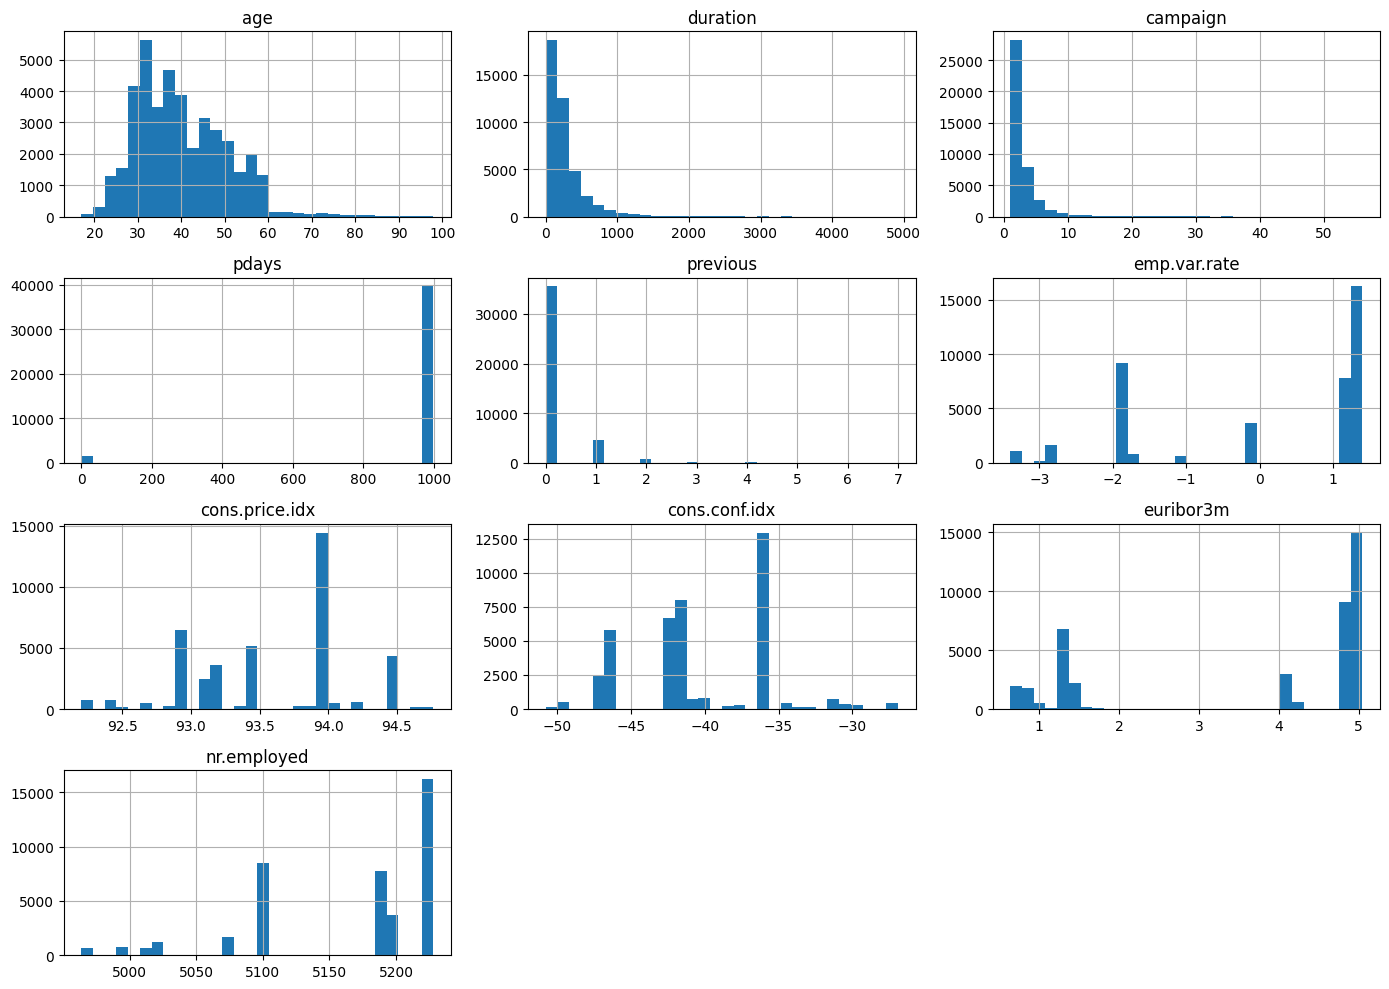

In [8]:
# Detectar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Generar histogramas para las columnas numéricas
df[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()


b) Countplot para algunas variables categóricas

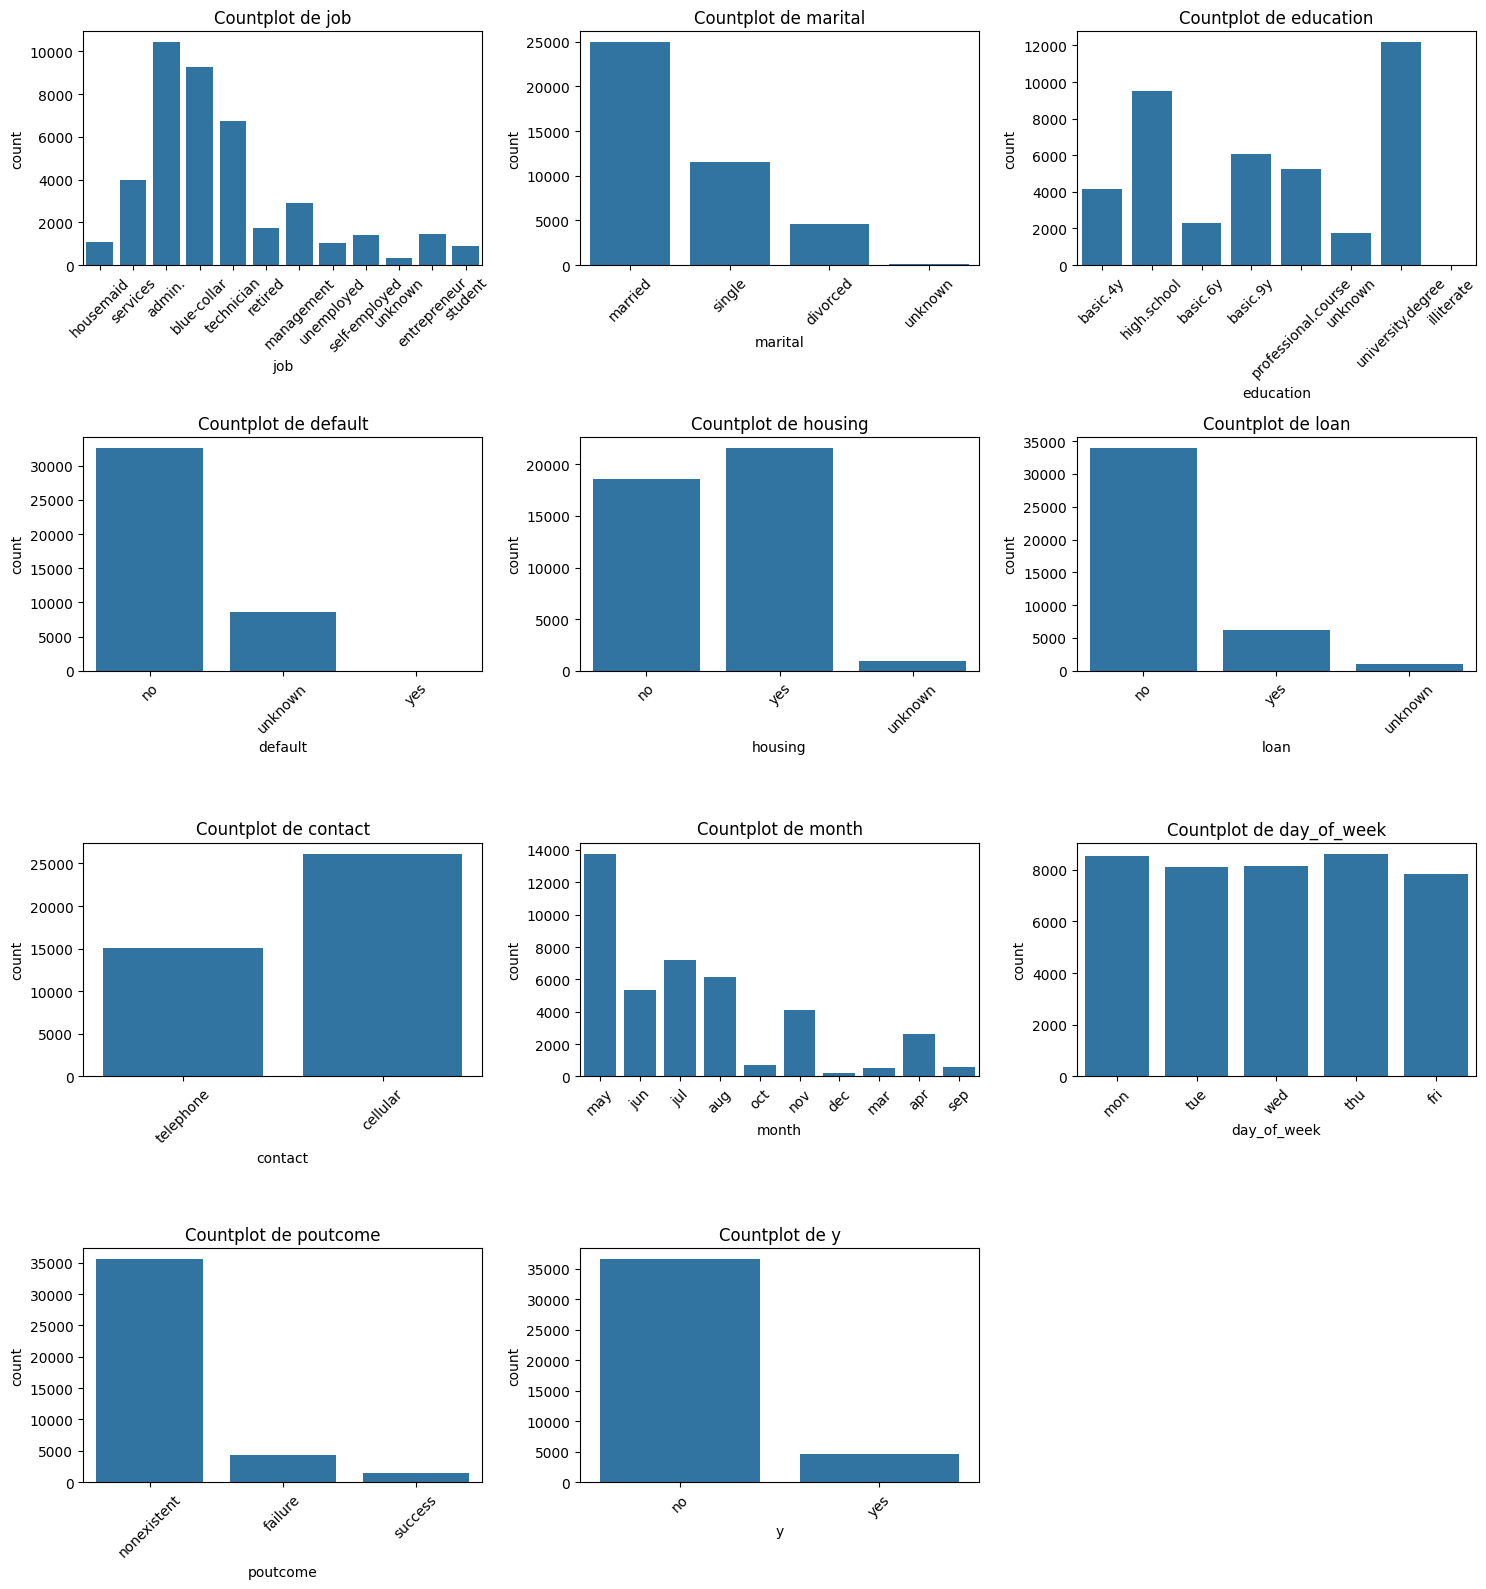

In [9]:
# Selecciona las columnas categóricas (tipo 'object')
categorical_cols = df.select_dtypes(include=['object']).columns

# Calcula el número de filas y columnas para los subplots
num_plots = len(categorical_cols)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols  # Asegúrate de tener suficientes filas

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f"Countplot de {col}")
        axes[i].tick_params(axis='x', rotation=45)

# Oculta los ejes no utilizados
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


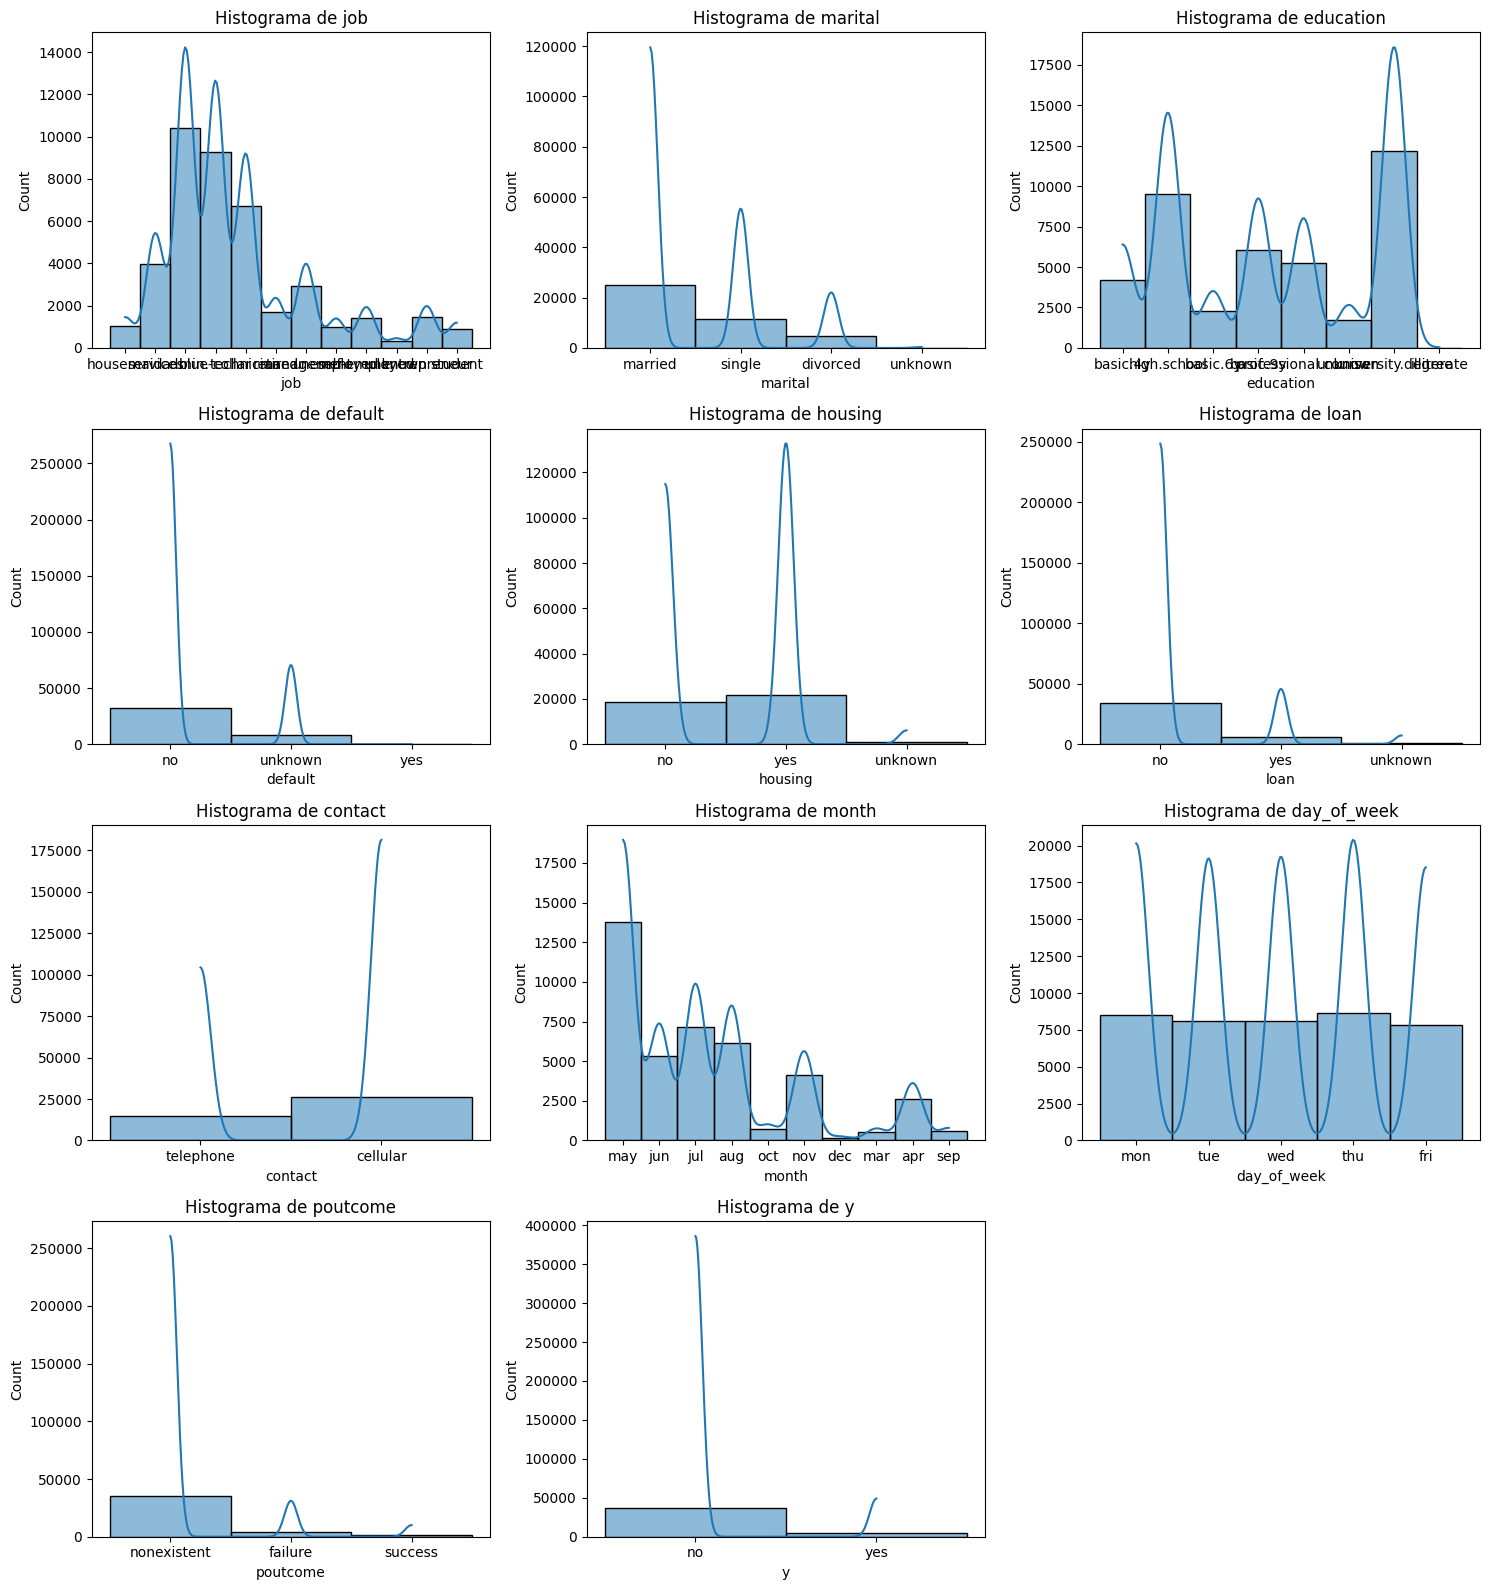

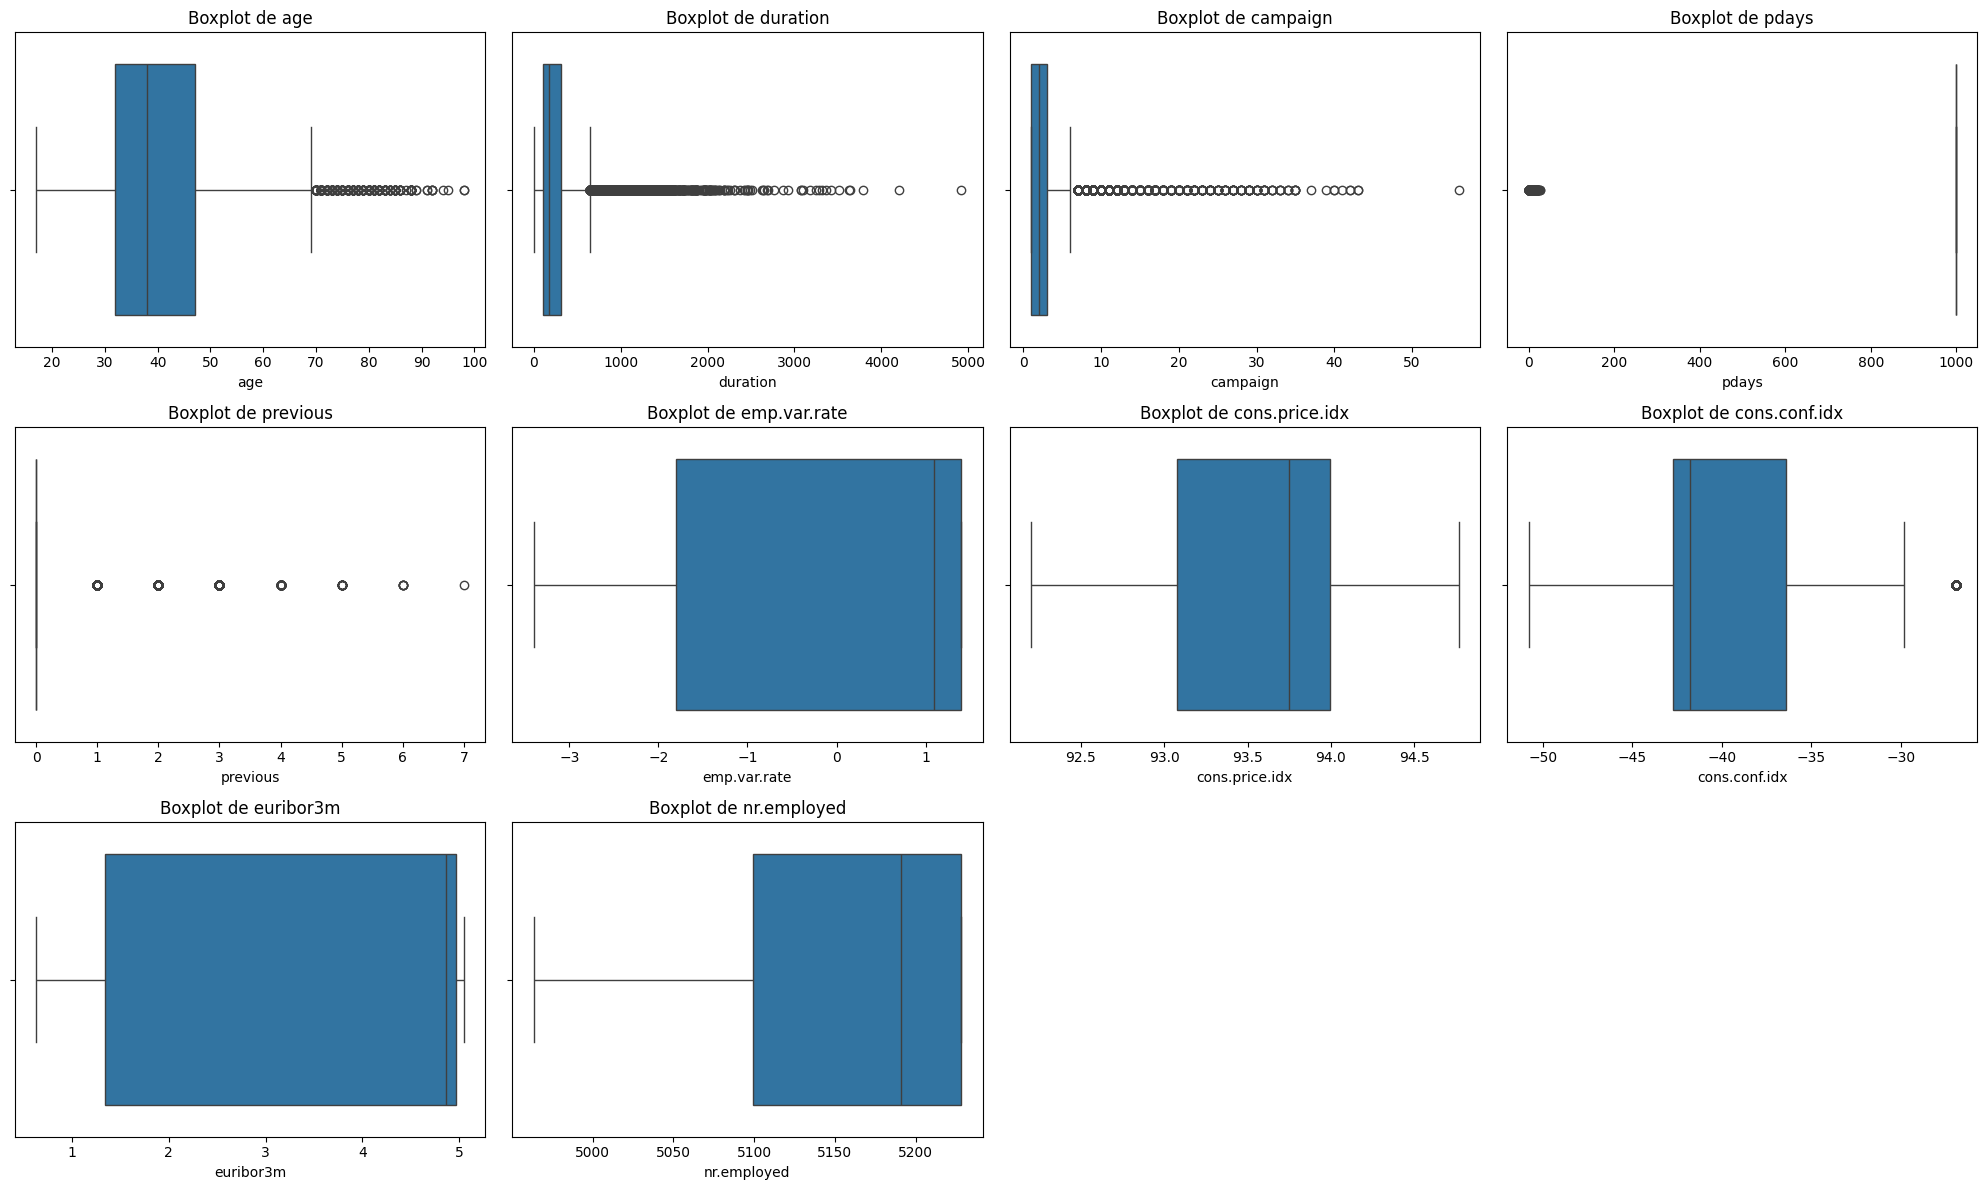

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Clasificar columnas según su tipo
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Definir función para gráficos en cuadrícula
def plot_grid(columns, plot_func, title, n_cols=3):
    n_rows = math.ceil(len(columns) / n_cols)  # Calcular número de filas
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()  # Asegurar compatibilidad con iteración

    for i, col in enumerate(columns):
        plot_func(df, col, axes[i])  # Función para graficar
        axes[i].set_title(f"{title} de {col}")
    
    # Ocultar los ejes sobrantes (si hay más espacios que gráficos)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Eliminar subgráficos vacíos

    plt.tight_layout()
    plt.show()

# Crear funciones específicas para histogramas y boxplots
def hist_plot(data, column, ax):
    sns.histplot(data=data, x=column, kde=True, ax=ax)

def box_plot(data, column, ax):
    sns.boxplot(data=data, x=column, y=None, ax=ax)

# Graficar variables categóricas (histogramas)
plot_grid(categorical_cols, hist_plot, "Histograma", n_cols=3)

# Graficar variables numéricas (boxplots)
plot_grid(numerical_cols, box_plot, "Boxplot", n_cols=4)

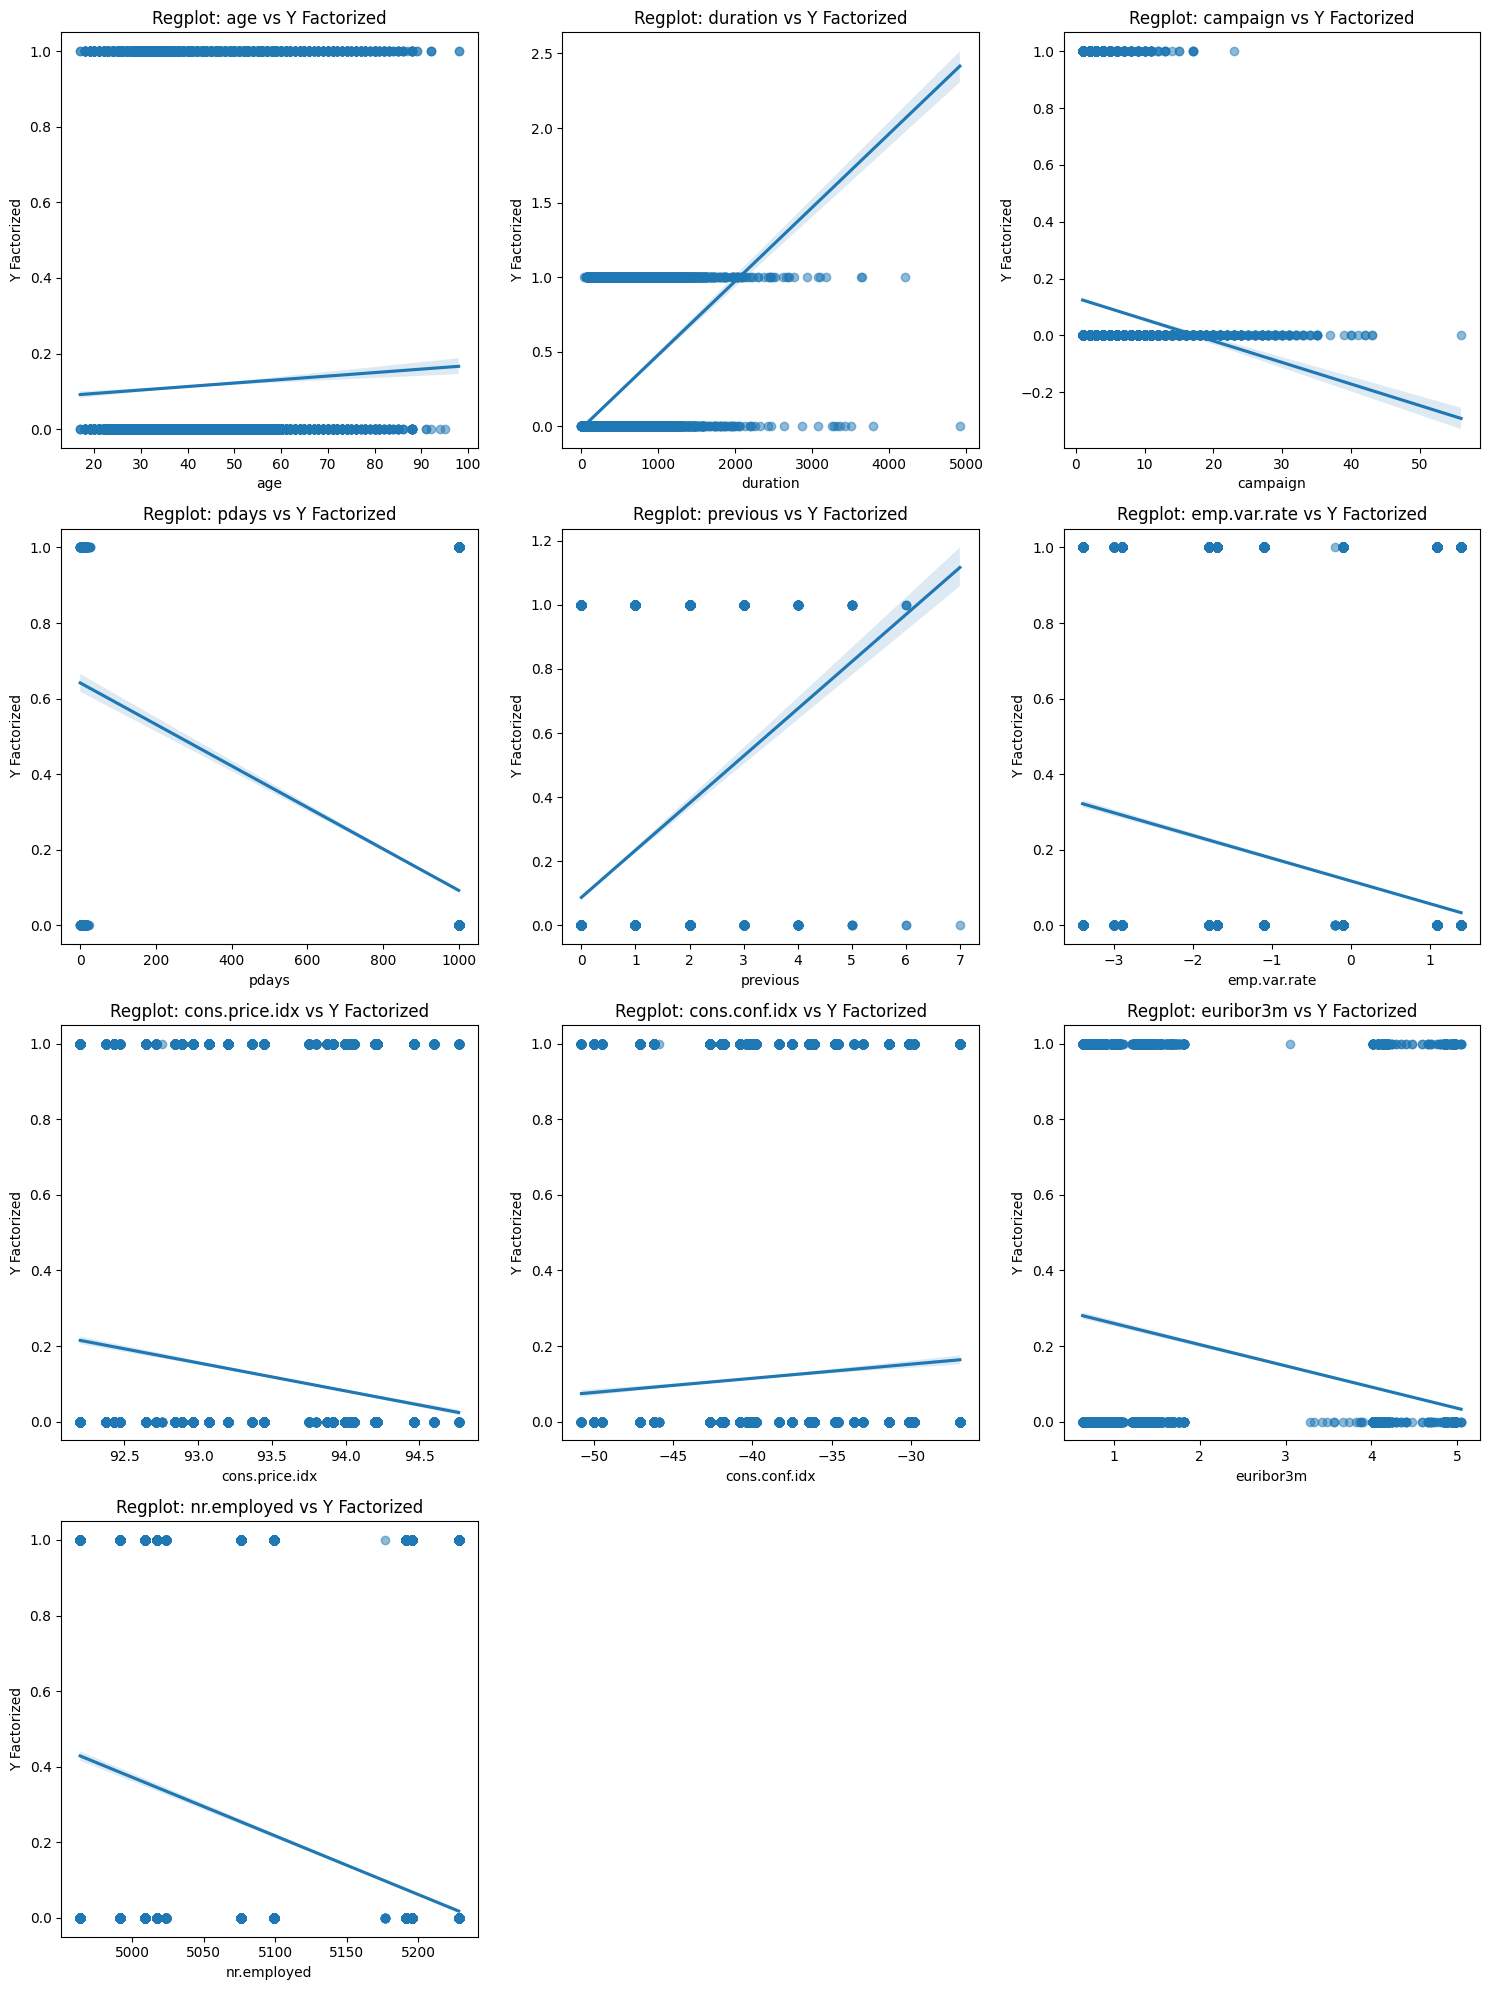

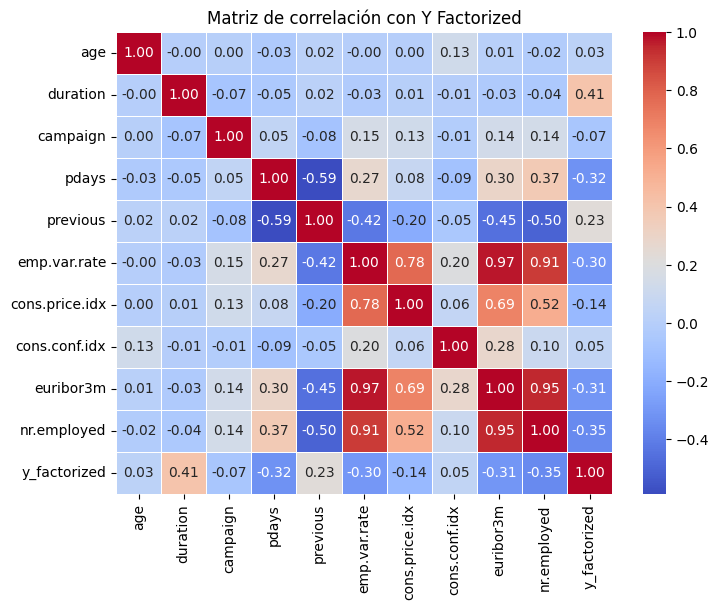

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Factorizar la variable objetivo "y" sin modificar el DataFrame
y_factorized, _ = pd.factorize(df["y"])

# Identificar columnas numéricas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Configuración para subplots (3 gráficos por fila)
num_cols = 3  # Número de gráficos por fila
num_plots = len(numerical_cols)  # Número total de gráficos
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcular filas necesarias

# Crear el espacio para subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Asegurar que 'axes' sea una matriz plana para iterar fácilmente
axes = axes.flatten()

# Iterar sobre cada columna y graficar en el espacio asignado
for i, col in enumerate(numerical_cols):
    sns.regplot(data=df, x=col, y=y_factorized, ax=axes[i], scatter_kws={'alpha': 0.5})
    axes[i].set_title(f"Regplot: {col} vs Y Factorized")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Y Factorized")

# Eliminar ejes vacíos si hay menos gráficos que espacios creados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()

# Heatmap con correlaciones de todas las variables numéricas respecto a 'y_factorized'
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_cols].assign(y_factorized=y_factorized).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación con Y Factorized")
plt.show()


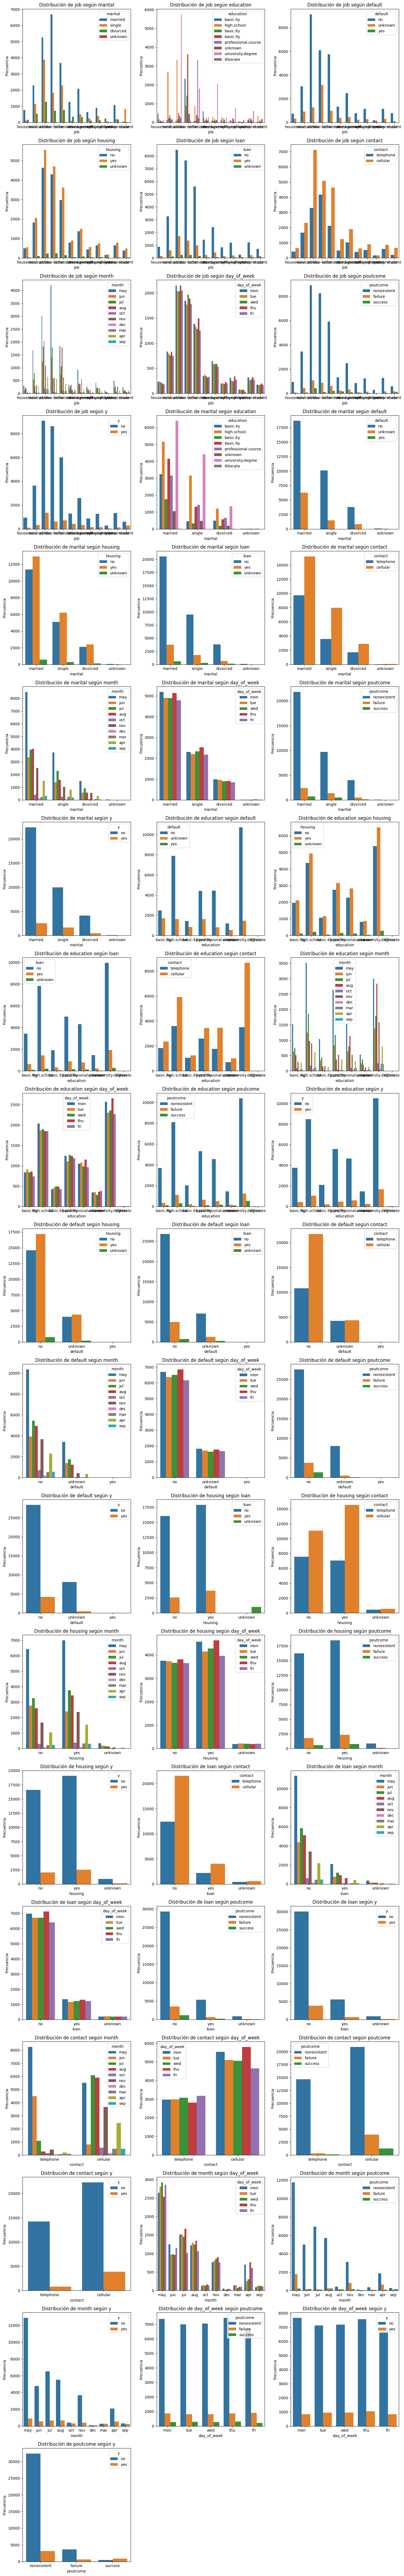

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools  # Para hacer combinaciones de pares de variables categóricas

# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Generar todas las combinaciones posibles de pares de variables categóricas
category_pairs = list(itertools.combinations(categorical_cols, 2))

# Calcular el número de filas necesarias
num_rows = (len(category_pairs) + 2) // 3  # Cada fila contiene 3 gráficos

# Crear subplots para cada combinación de variables categóricas, con 3 gráficos por fila
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Si solo hay una fila, convertir axes en una matriz para evitar errores de indexación
if num_rows == 1:
    axes = [axes]

# Graficar cada combinación de variables categóricas
for i, (cat1, cat2) in enumerate(category_pairs):
    row = i // 3
    col = i % 3
    sns.countplot(data=df, x=cat1, hue=cat2, ax=axes[row, col])
    axes[row, col].set_title(f"Distribución de {cat1} según {cat2}")
    axes[row, col].set_xlabel(cat1)
    axes[row, col].set_ylabel("Frecuencia")

# Ocultar ejes vacíos
for i in range(len(category_pairs), num_rows * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import json

def factorize_all_categoricals(df, save_json=True, json_filename="categorical_transformation_rules.json"):
    """
    Detecta todas las columnas categóricas en el DataFrame, las factoriza y guarda
    el mapeo de transformación (valor original a código numérico) en un archivo JSON.
    
    Se crea una nueva columna para cada columna categórica con el sufijo "_n".
    
    Parameters:
      df (pd.DataFrame): DataFrame de entrada.
      save_json (bool): Si True, guarda el mapeo en un archivo JSON.
      json_filename (str): Nombre del archivo JSON para guardar el mapeo.
      
    Returns:
      df (pd.DataFrame): DataFrame modificado con columnas factorizadas.
      transformation_rules (dict): Diccionario con el mapeo de cada columna categórica.
    """
    # Detectar columnas categóricas
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    transformation_rules = {}
    
    for col in cat_cols:
        # Factorizar la columna
        codes, uniques = pd.factorize(df[col])
        df[col + "_n"] = codes  # Nueva columna con los códigos
        
        # Crear el mapeo: {valor_original: código}
        mapping = {value: code for code, value in enumerate(uniques)}
        transformation_rules[col] = mapping

    # Guardar el mapeo en un archivo JSON si se desea
    if save_json:
        with open(json_filename, "w") as f:
            json.dump(transformation_rules, f, indent=4)
        print(f"Transformation rules saved in {json_filename}")

    return df, transformation_rules

# Ejemplo de uso:
# Supongamos que ya tienes un DataFrame "df"
df, transformation_rules = factorize_all_categoricals(df)

Transformation rules saved in categorical_transformation_rules.json


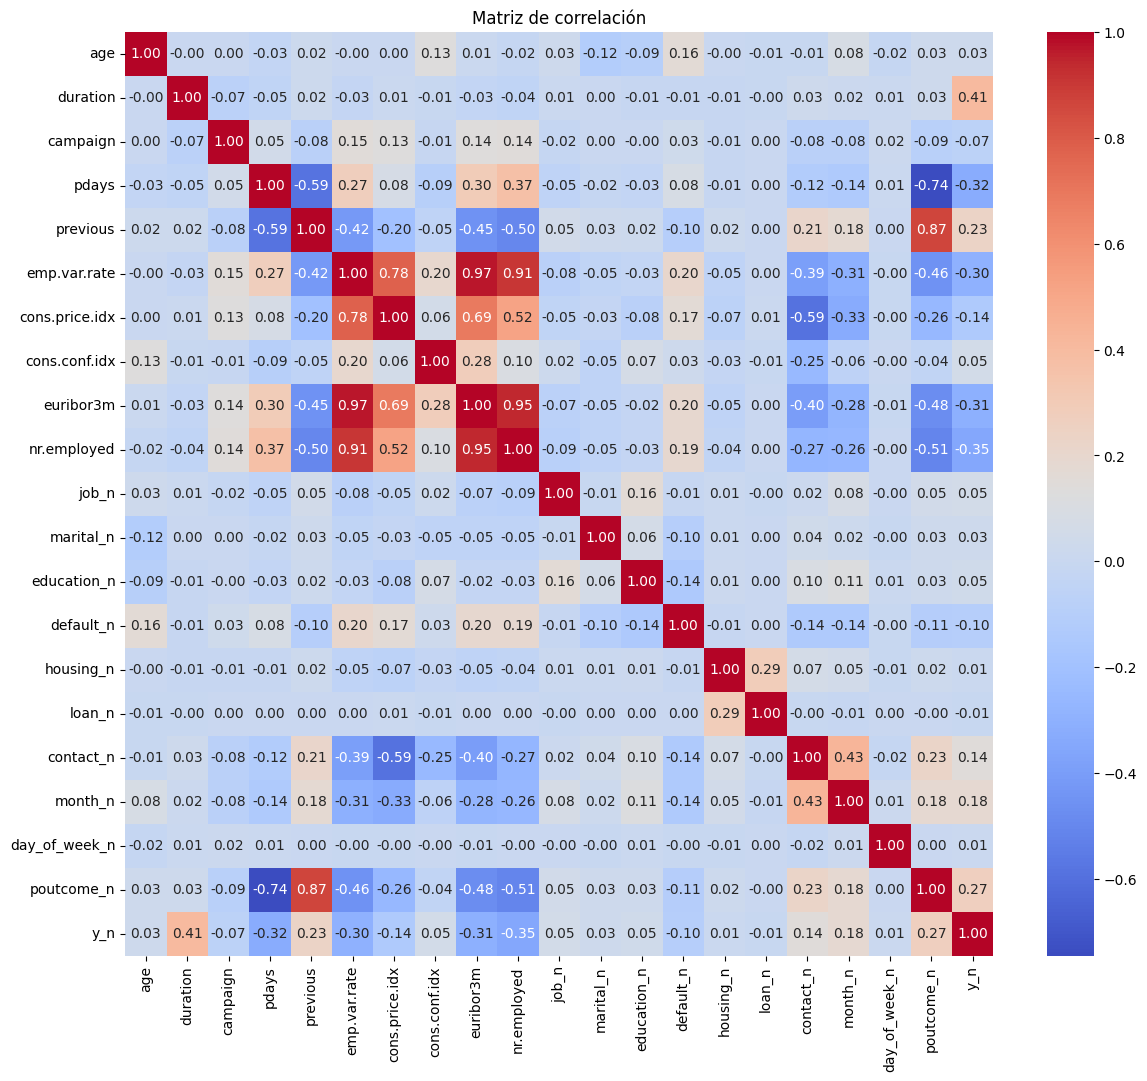

In [14]:

# Ruta al archivo JSON con las reglas de factorización
json_file_path = "/workspaces/ejercicio_regresion_logistica/src/categorical_transformation_rules.json"

# Cargar el archivo JSON
with open(json_file_path, 'r') as file:
    factorization_rules = json.load(file)

# Aplicar la factorización a las columnas categóricas según las reglas del archivo JSON
for col, mapping in factorization_rules.items():
    df[col + "_n"] = df[col].map(mapping)

# Seleccionar todas las columnas numéricas en el DataFrame
numeric_cols = df.select_dtypes(include=['number']).columns

# Crear la matriz de correlación
corr_matrix = df[numeric_cols].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

Correlación (Heatmap) de las variables numéricas y categoricas

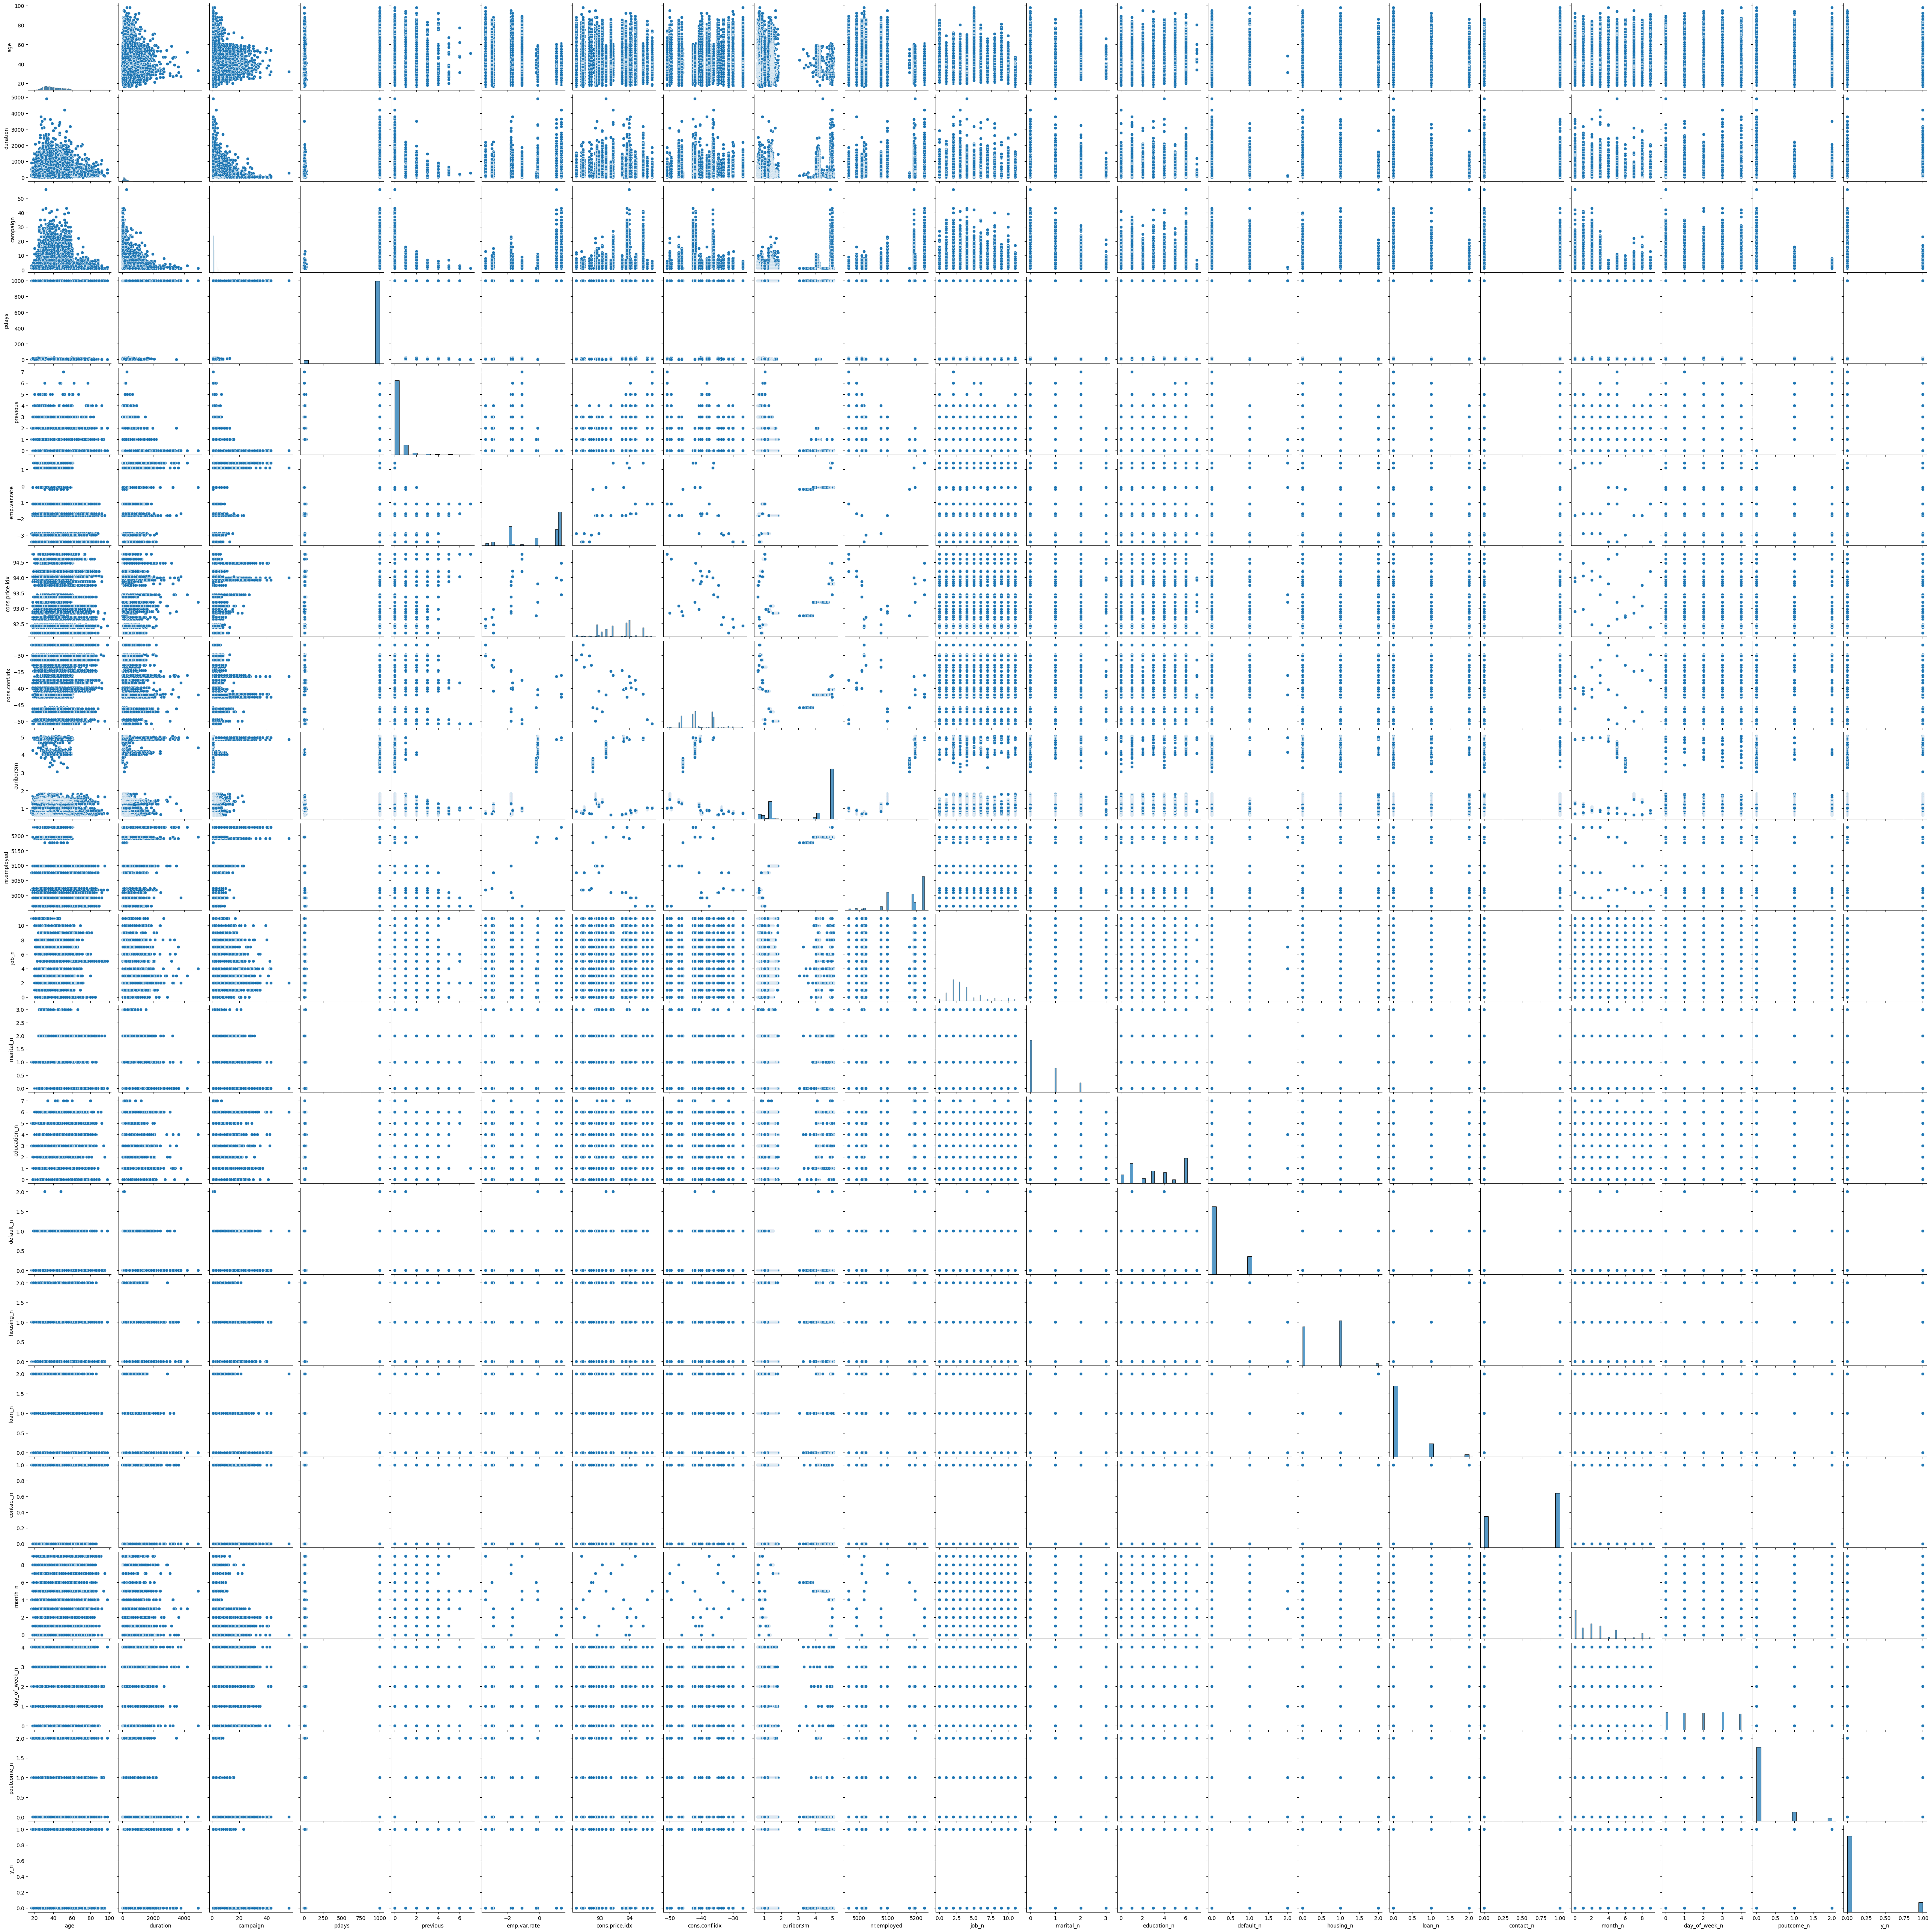

In [15]:
sns.pairplot(data = df)

In [16]:
import pickle

pickle_file_path = "dataframe_progreso.pkl"

with open(pickle_file_path, "wb") as file:
    pickle.dump(df, file)

print(f"Dataframe guardado existosamente en {pickle_file_path}")


Dataframe guardado existosamente en dataframe_progreso.pkl


In [17]:
import pickle  # Asegúrate de importar pickle antes de usarlo

# Ruta donde guardaste tu archivo Pickle
pickle_file_path = "/workspaces/ejercicio_regresion_logistica/src/dataframe_progreso.pkl"

# Cargar el dataframe desde el archivo Pickle
with open(pickle_file_path, "rb") as file:  # "rb" significa "read binary"
    df = pickle.load(file)

print("Dataframe cargado exitosamente:")



Dataframe cargado exitosamente:


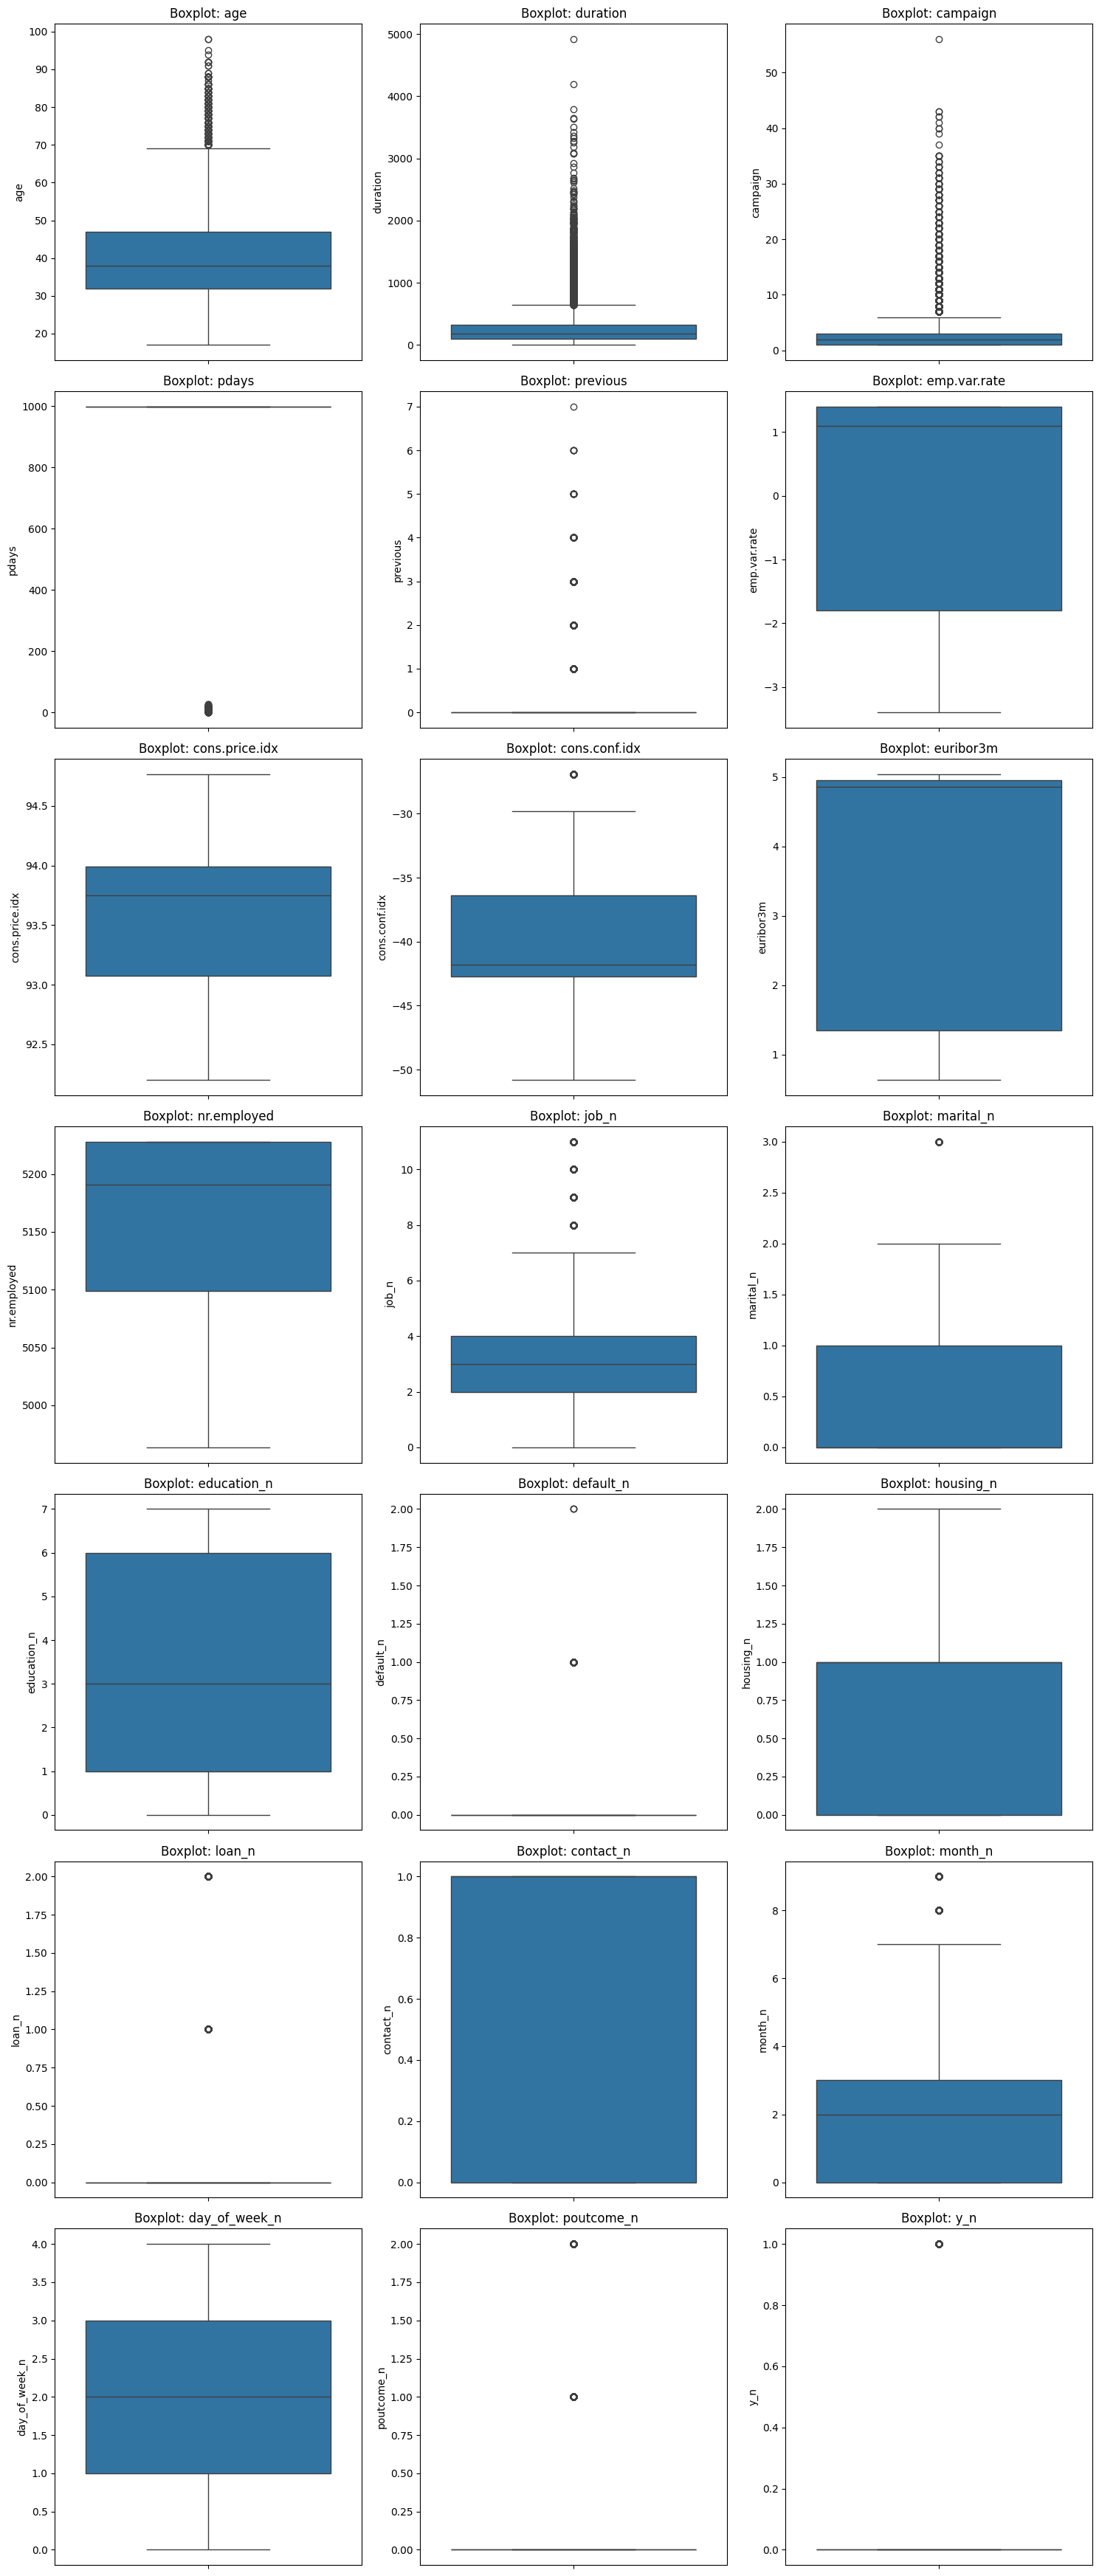

In [18]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo Pickle
pickle_file_path = "/workspaces/ejercicio_regresion_logistica/src/dataframe_progreso.pkl"

with open(pickle_file_path, "rb") as file:
    df = pickle.load(file)

# Filtrar las columnas de tipo float64 e int64
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Configuración para subplots (3 gráficos por fila)
num_cols = 3  # Número de gráficos por fila
num_plots = len(numerical_columns.columns)  # Número total de gráficos
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcular filas necesarias

# Crear el espacio para subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Asegurar que 'axes' sea una matriz plana para iterar fácilmente
axes = axes.flatten()

# Iterar sobre cada columna y graficar en el espacio asignado
for i, column in enumerate(numerical_columns.columns):
    sns.boxplot(data=df, y=column, ax=axes[i])  # 'y' para orientación vertical
    axes[i].set_title(f"Boxplot: {column}")

# Eliminar ejes vacíos si hay menos gráficos que espacios disponibles
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()


In [19]:
import json
 
# Copiar el dataframe para trabajar con los datos con y sin outliers
df_con_outliers = df.copy()
df_sin_outliers = df.copy()
 
# Función para reemplazar los outliers de una columna en un dataframe
def replace_outliers_from_column(column, df):
   column_stats = df[column].describe()  # Calcular estadísticas de la columna
   column_iqr = column_stats["75%"] - column_stats["25%"]  # Rango intercuartílico (IQR)
   upper_limit = column_stats["75%"] + 1.5 * column_iqr  # Límite superior
   lower_limit = column_stats["25%"] - 1.5 * column_iqr  # Límite inferior
 
   # Reemplazar los outliers superiores por el límite superior
   df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
   # Reemplazar los outliers inferiores por el límite inferior
   df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
 
   # Devuelve el dataframe modificado y los límites de los outliers
   return df.copy(), [lower_limit, upper_limit]
 
# Filtrar solo las columnas numéricas (float64 e int64)
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
 
# Diccionario para almacenar los límites de outliers para cada columna
outliers_dict = {}
 
# Aplicar la función a cada columna numérica
for column in numerical_columns:
   df_sin_outliers, limits_list = replace_outliers_from_column(column, df_sin_outliers)
   outliers_dict[column] = limits_list  # Guardar los límites en el diccionario
 
# Guardar los límites de los outliers en un archivo JSON
with open("outliers_replacement.json", "w") as f:
   json.dump(outliers_dict, f)
 
# Mostrar el diccionario con los límites de cada columna, línea por línea
print("Límites de outliers para cada columna:")
for key, value in outliers_dict.items():
   print(f"{key}: {value}")

Límites de outliers para cada columna:
age: [np.float64(9.5), np.float64(69.5)]
duration: [np.float64(-223.5), np.float64(644.5)]
campaign: [np.float64(-2.0), np.float64(6.0)]
pdays: [np.float64(999.0), np.float64(999.0)]
previous: [np.float64(0.0), np.float64(0.0)]
emp.var.rate: [np.float64(-6.6000000000000005), np.float64(6.200000000000001)]
cons.price.idx: [np.float64(91.69650000000001), np.float64(95.3725)]
cons.conf.idx: [np.float64(-52.150000000000006), np.float64(-26.949999999999992)]
euribor3m: [np.float64(-4.081499999999999), np.float64(10.3865)]
nr.employed: [np.float64(4905.6), np.float64(5421.6)]
job_n: [np.float64(-1.0), np.float64(7.0)]
marital_n: [np.float64(-1.5), np.float64(2.5)]
education_n: [np.float64(-6.5), np.float64(13.5)]
default_n: [np.float64(0.0), np.float64(0.0)]
housing_n: [np.float64(-1.5), np.float64(2.5)]
loan_n: [np.float64(0.0), np.float64(0.0)]
contact_n: [np.float64(-1.5), np.float64(2.5)]
month_n: [np.float64(-4.5), np.float64(7.5)]
day_of_week_n: [

In [20]:
df_sin_outliers


age          job  marital            education  default housing loan  \
0      56.0    housemaid  married             basic.4y       no      no   no   
1      57.0     services  married          high.school  unknown      no   no   
2      37.0     services  married          high.school       no     yes   no   
3      40.0       admin.  married             basic.6y       no      no   no   
4      56.0     services  married          high.school       no      no  yes   
...     ...          ...      ...                  ...      ...     ...  ...   
41183  69.5      retired  married  professional.course       no     yes   no   
41184  46.0  blue-collar  married  professional.course       no      no   no   
41185  56.0      retired  married    university.degree       no     yes   no   
41186  44.0   technician  married  professional.course       no      no   no   
41187  69.5      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  marital_n  education_n  default_n  \
0      telephone   may         mon  ...        0.0            0        0.0   
1      telephone   may         mon  ...        0.0            1        0.0   
2      telephone   may         mon  ...        0.0            1        0.0   
3      telephone   may         mon  ...        0.0            2        0.0   
4      telephone   may         mon  ...        0.0            1        0.0   
...          ...   ...         ...  ...        ...          ...        ...   
41183   cellular   nov         fri  ...        0.0            4        0.0   
41184   cellular   nov         fri  ...        0.0            4        0.0   
41185   cellular   nov         fri  ...        0.0            6        0.0   
41186   cellular   nov         fri  ...        0.0            4        0.0   
41187   cellular   nov         fri  ...        0.0            4        0.0   

       housing_n loan_n  contact_n  month_n  day_of_week_n  poutcome_n  y_n  
0              0    0.0          0      0.0              0         0.0  0.0  
1              0    0.0          0      0.0              0         0.0  0.0  
2              1    0.0          0      0.0              0         0.0  0.0  
3              0    0.0          0      0.0              0         0.0  0.0  
4              0    0.0          0      0.0              0         0.0  0.0  
...          ...    ...        ...      ...            ...         ...  ...  
41183          1    0.0          1      5.0              4         0.0  0.0  
41184          0    0.0          1      5.0              4         0.0  0.0  
41185          1    0.0          1      5.0              4         0.0  0.0  
41186          0    0.0          1      5.0              4         0.0  0.0  
41187          1    0.0          1      5.0              4         0.0  0.0  

[41176 rows x 32 columns]

In [21]:
df_con_outliers.isnull().sum().sort_values(ascending=False)
df_sin_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
contact_n         0
month_n           0
day_of_week_n     0
poutcome_n        0
y_n               0
dtype: int64

In [22]:
df.isnull().sum().sort_values(ascending=False) / len(df)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
job_n             0.0
marital_n         0.0
education_n       0.0
default_n         0.0
housing_n         0.0
loan_n            0.0
contact_n         0.0
month_n           0.0
day_of_week_n     0.0
poutcome_n        0.0
y_n               0.0
dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
 
# Seleccionar automáticamente las columnas numéricas (float64 e int64)
num_variables = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
 
# Eliminar 'y_n' de las características
num_variables.remove("y_n")  # Excluir la columna 'y_n' del conjunto de variables
 
# Dividimos los datos en muestras de train y test
X_con_outliers = df_con_outliers[num_variables]  # Solo columnas numéricas (sin y_n)
X_sin_outliers = df_sin_outliers[num_variables]  # Solo columnas numéricas (sin y_n)
 
# Establecer 'y_n' como la variable objetivo
y = df_con_outliers["y_n"]  # 'y_n' es ahora la variable objetivo
 
# Split (división) en conjunto de entrenamiento y prueba
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(
   X_con_outliers, y, test_size=0.2, random_state=42
)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(
   X_sin_outliers, test_size=0.2, random_state=42
)

# Guardar los conjuntos de datos resultantes en archivos Excel
output_dir = "/workspaces/ejercicio_regresion_logistica/data/processed/"  # Ruta especificada
 
# Asegurarse de que la carpeta de salida existe
os.makedirs(output_dir, exist_ok=True)
 
# Guardar en Excel
X_train_con_outliers.to_excel(f"{output_dir}X_train_con_outliers.xlsx", index=False)
X_train_sin_outliers.to_excel(f"{output_dir}X_train_sin_outliers.xlsx", index=False)
X_test_con_outliers.to_excel(f"{output_dir}X_test_con_outliers.xlsx", index=False)
X_test_sin_outliers.to_excel(f"{output_dir}X_test_sin_outliers.xlsx", index=False)
y_train.to_excel(f"{output_dir}y_train.xlsx", index=False)
y_test.to_excel(f"{output_dir}y_test.xlsx", index=False)
 
# Mostrar una vista previa del conjunto de datos con outliers
print("Vista previa de X_train_con_outliers:")
print(X_train_con_outliers.head())

Vista previa de X_train_con_outliers:
       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
12348   29       286         3    999         0           1.4          93.918   
8565    50       178         6    999         0           1.4          94.465   
21424   29       103         4    999         0           1.4          93.444   
3316    35       135         1    999         0           1.1          93.994   
33246   40       418         1    999         0          -1.8          92.893   

       cons.conf.idx  euribor3m  nr.employed  job_n  marital_n  education_n  \
12348          -42.7      4.959       5228.1     10          0            2   
8565           -41.8      4.864       5228.1      2          1            6   
21424          -36.1      4.963       5228.1      2          1            6   
3316           -36.4      4.860       5191.0      2          1            6   
33246          -46.2      1.291       5099.1      3          1            1   



In [24]:
from sklearn.preprocessing import StandardScaler

# Normalizamos el DataFrame con outliers y lo guardamos
scaler_con_outliers = StandardScaler()
scaler_con_outliers.fit(X_train_con_outliers)
 
X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index=X_train_con_outliers.index, columns=num_variables)
 
X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index=X_test_con_outliers.index, columns=num_variables)
 
# Guardar los datasets normalizados
output_dir = "/workspaces/ejercicio_regresion_logistica/data/processed/"  # Ruta especificada
 
# Guardar en Excel
X_train_con_outliers_norm.to_excel(f"{output_dir}X_train_con_outliers_norm.xlsx", index=False)
X_test_con_outliers_norm.to_excel(f"{output_dir}X_test_con_outliers_norm.xlsx", index=False)
 
# Normalizamos el DataFrame sin outliers y lo guardamos
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)
 
X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index=X_train_sin_outliers.index, columns=num_variables)
 
X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index=X_test_sin_outliers.index, columns=num_variables)
 
# Guardar los datasets normalizados
X_train_sin_outliers_norm.to_excel(f"{output_dir}X_train_sin_outliers_norm.xlsx", index=False)
X_test_sin_outliers_norm.to_excel(f"{output_dir}X_test_sin_outliers_norm.xlsx", index=False)
 
# Mostrar una vista previa del conjunto de datos normalizado con outliers
print("Vista previa de X_train_con_outliers_norm:")
print(X_train_con_outliers_norm.head())


Vista previa de X_train_con_outliers_norm:
            age  duration  campaign     pdays  previous  emp.var.rate  \
12348 -1.058427  0.112453  0.152155  0.195697 -0.348601      0.838815   
8565   0.954767 -0.305973  1.229538  0.195697 -0.348601      0.838815   
21424 -1.058427 -0.596546  0.511282  0.195697 -0.348601      0.838815   
3316  -0.483229 -0.472568 -0.566100  0.195697 -0.348601      0.647683   
33246 -0.003897  0.623862 -0.566100  0.195697 -0.348601     -1.199927   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed     job_n  \
12348        0.589534      -0.470932   0.771196     0.843413  2.600348   
8565         1.534740      -0.276368   0.716413     0.843413 -0.679177   
21424       -0.229530       0.955866   0.773502     0.843413 -0.679177   
3316         0.720860       0.891011   0.714107     0.330793 -0.679177   
33246       -1.181648      -1.227566  -1.343979    -0.939011 -0.269237   

       marital_n  education_n  default_n  housing_n    loan_n  contact_n 

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizamos el DataFrame con outliers utilizando MinMaxScaler y lo guardamos
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)
 
X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index=X_train_con_outliers.index, columns=num_variables)
 
X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index=X_test_con_outliers.index, columns=num_variables)
 
# Guardar los datasets normalizados
output_dir = "/workspaces/ejercicio_regresion_logistica/data/processed/"  # Ruta especificada
 
# Guardar en Excel
X_train_con_outliers_scal.to_excel(f"{output_dir}X_train_con_outliers_scal.xlsx", index=False)
X_test_con_outliers_scal.to_excel(f"{output_dir}X_test_con_outliers_scal.xlsx", index=False)
 
# Escalamos el DataFrame sin outliers utilizando StandardScaler y lo guardamos
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)
 
X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index=X_train_sin_outliers.index, columns=num_variables)
 
X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index=X_test_sin_outliers.index, columns=num_variables)
 
# Guardar los datasets normalizados
X_train_sin_outliers_scal.to_excel(f"{output_dir}X_train_sin_outliers_scal.xlsx", index=False)
X_test_sin_outliers_scal.to_excel(f"{output_dir}X_test_sin_outliers_scal.xlsx", index=False)
 
# Mostrar una vista previa del conjunto de datos escalados con outliers
print("Vista previa de X_train_con_outliers_scal:")
print(X_train_con_outliers_scal.head())

Vista previa de X_train_con_outliers_scal:
            age  duration  campaign  pdays  previous  emp.var.rate  \
12348  0.148148  0.058154  0.036364    1.0       0.0      1.000000   
8565   0.407407  0.036194  0.090909    1.0       0.0      1.000000   
21424  0.148148  0.020943  0.054545    1.0       0.0      1.000000   
3316   0.222222  0.027450  0.000000    1.0       0.0      0.937500   
33246  0.283951  0.084994  0.000000    1.0       0.0      0.333333   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed     job_n  \
12348        0.669135       0.338912   0.980503     1.000000  0.909091   
8565         0.882307       0.376569   0.958966     1.000000  0.181818   
21424        0.484412       0.615063   0.981410     1.000000  0.181818   
3316         0.698753       0.602510   0.958059     0.859735  0.181818   
33246        0.269680       0.192469   0.148946     0.512287  0.272727   

       marital_n  education_n  default_n  housing_n  loan_n  contact_n  \
12348   0.000000 

In [26]:
from sklearn.feature_selection import f_regression, SelectKBest
import pandas as pd

# Con un valor de k = 5 se seleccionan las 5 mejores características
# Cambiamos f_classif por f_regression ya que trabajamos con regresión
selection_model = SelectKBest(f_regression, k=5)
 
# Ajustamos el modelo de selección de características
selection_model.fit(X_train_con_outliers, y_train)
 
# Obtenemos el soporte de las características seleccionadas
ix = selection_model.get_support()
 
# Transformar los conjuntos de datos
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns=X_train_con_outliers.columns[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns=X_test_con_outliers.columns[ix])
 
# Vista previa de los conjuntos de datos seleccionados
print("Características seleccionadas - Conjunto de entrenamiento:")
print(X_train_sel.head())
 
print("Características seleccionadas - Conjunto de prueba:")
print(X_test_sel.head())
 
# Agregamos la variable objetivo al conjunto de datos seleccionados
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
 
# Guardamos los conjuntos de datos en archivos CSV
output_dir = "/workspaces/ejercicio_regresion_logistica/data/processed/"  # Ruta especificada
 
X_train_sel.to_csv(f"{output_dir}clean_train_data.csv", index=False)
X_test_sel.to_csv(f"{output_dir}clean_test_data.csv", index=False)

Características seleccionadas - Conjunto de entrenamiento:
   duration  pdays  emp.var.rate  euribor3m  nr.employed
0     286.0  999.0           1.4      4.959       5228.1
1     178.0  999.0           1.4      4.864       5228.1
2     103.0  999.0           1.4      4.963       5228.1
3     135.0  999.0           1.1      4.860       5191.0
4     418.0  999.0          -1.8      1.291       5099.1
Características seleccionadas - Conjunto de prueba:
   duration  pdays  emp.var.rate  euribor3m  nr.employed
0    1460.0  999.0          -2.9      1.266       5076.2
1     248.0  999.0          -1.8      1.299       5099.1
2     275.0  999.0          -1.1      0.959       4963.6
3     186.0  999.0          -1.8      1.299       5099.1
4     184.0  999.0           1.4      4.963       5228.1
